# MCLP 적용 코드

In [1]:
import pandas as pd
import geopandas as gpd
import geopandas
import numpy
from pulp import *
import matplotlib.pyplot as plt
from shapely import wkt
from tqdm import tqdm

In [41]:
# 격자 단위 후보군, 수요, 행정동 경계 data 
df=gpd.read_file('/Users/jacob/Desktop/VS_Code_Repository/DeepLearning_Alpaco/빅콘테스트2022/Raw data/용인시_Grid_filtered_v8(drop_x_score_0).geojson')
df_shp=gpd.read_file('/Users/jacob/Desktop/VS_Code_Repository/DeepLearning_Alpaco/빅콘테스트2022/Raw data/용인시_읍면동_EPSG4326.geojson')
df_demand = gpd.read_file('/Users/jacob/Desktop/VS_Code_Repository/DeepLearning_Alpaco/빅콘테스트2022/Raw data/용인시_Grid_filtered_v8(drop_x_score_0).geojson')

df_shp.to_crs('epsg:5178',inplace=True)

df.fillna(0,inplace=True)
df_demand.fillna(0,inplace=True)
# df.dropna(inplace=True)
# df_demand.dropna(inplace=True)

df.reset_index(inplace=True)
df_demand.reset_index(inplace=True)

In [44]:
# 수요, 충전소 후보지 Distance matrix 생성 
tqdm.pandas()
dist_matrix = df.geometry.progress_apply(lambda g: df_demand.distance(g))

100%|██████████| 6044/6044 [04:49<00:00, 20.88it/s]


In [4]:
dist_matrix.to_csv('/Users/jacob/Desktop/VS_Code_Repository/DeepLearning_Alpaco/빅콘테스트2022/Raw data/dist_matrix.csv',index=False,encoding='utf-8')

In [45]:
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,6034,6035,6036,6037,6038,6039,6040,6041,6042,6043
0,0.000000,17329.875056,18238.833818,5161.434647,24676.090131,12175.888790,9303.833889,10977.333328,6774.267692,3785.527677,...,17867.704301,19780.190727,11779.734140,16750.353563,13218.648236,17275.547472,1711.737444,11449.541816,17962.319129,18100.140457
1,17329.875056,0.000000,1552.429308,19450.597407,40580.356854,29504.292455,12496.495094,13069.912727,15439.352684,17304.754959,...,538.520565,5009.030059,17047.124796,30914.474036,4272.034354,447.217005,18134.359937,12229.975177,632.460327,28821.221641
2,18238.833818,1552.429308,0.000000,20011.398524,41810.009635,30384.437931,13920.235768,14562.048236,15805.182099,17925.536894,...,1303.850428,3501.454923,18543.335146,32244.627271,5517.287664,1253.005949,19142.768362,13735.461051,1315.304677,30286.864216
3,5161.434647,19450.597407,20011.398524,0.000000,26382.394969,11677.846005,14042.899124,15822.257504,4717.026408,2256.119978,...,19964.369412,20713.678952,16929.394668,20041.362514,15825.732354,19284.336667,6530.746813,16172.012895,20064.050103,22501.063086
4,24676.090131,40580.356854,41810.009635,26382.394969,0.000000,15660.581546,28571.885299,28803.000526,30620.001181,27126.764946,...,41100.803076,43981.356641,25608.400245,10469.560846,36321.210679,40662.088748,23276.992732,29743.296517,41181.137854,16111.301574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6039,17275.547472,447.217005,1253.005949,19284.336667,40662.088748,29443.899488,12682.368128,13309.497194,15216.225118,17155.012828,...,728.016507,4627.129346,17290.592585,31046.172533,4341.691698,0.000000,18117.808941,12482.483265,824.627375,29038.991199
6040,1711.737444,18134.359937,19142.768362,6530.746813,23276.992732,11574.197603,8902.315041,10417.853113,8485.346407,5433.272797,...,18672.581811,20902.312024,10683.246567,15100.448119,13928.494493,18117.808941,0.000000,11006.446093,18764.204318,16401.346856
6041,11449.541816,12229.975177,13735.461051,16172.012895,29743.296517,21938.718660,2147.107534,943.405361,14946.016869,14103.299080,...,12657.110849,16861.920128,4826.008669,19527.567512,8668.399786,12482.483265,11006.446093,0.000000,12709.542687,16664.462409
6042,17962.319129,632.460327,1315.304677,20064.050103,41181.137854,30136.752426,13038.504539,13562.552079,16025.413884,17923.584310,...,100.000758,4809.402483,17532.960975,31489.446712,4887.776915,824.627375,18764.204318,12709.542687,0.000000,29329.563076


In [105]:
dist_matrix= pd.read_csv('/Users/jacob/Desktop/VS_Code_Repository/DeepLearning_Alpaco/빅콘테스트2022/Raw data/dist_matrix.csv')

In [46]:
# https://stackoverflow.com/questions/51501074/implementing-mclp-in-pulp
# MCLP code
import numpy as np
from tqdm import tqdm

listarray = []
for pp in df['geometry']:
    listarray.append((pp.x, pp.y))
nparray = np.array(listarray)

I=[i for i in range(df_demand.shape[0])]
J=[i for i in range(df.shape[0])]
# 충전소 후보지 커버 범위 반경 1km 로 정의
S = 1000
d = dist_matrix
# 수요지수
a = df_demand['x_score']
P = 30

# Compute the sets Ni
# NB: this will be a list in which each item is a list of nodes
# within the threshold distance of the i'th node

N = [[j for j in J if d[i][j] < S] for i in tqdm(I)]

# Formulate optimisation

prob = LpProblem("MCLP", LpMaximize)

x = LpVariable.dicts("x", J, cat='Binary')
y = LpVariable.dicts("y", I, cat='Binary')
# Objective
prob += lpSum([a[i]*y[i] for i in I])

# Constraints
for i in I:
    prob += lpSum([x[j] for j in N[i]]) >= y[i]

prob += lpSum([x[j] for j in J]) == P

# Solve problem
prob.solve()

x_soln = np.array([x[j].varValue for j in J])

# And print some output
print (("Status:"), LpStatus[prob.status])
print ("Population Served is = ", value(prob.objective))
print ("x = ", x_soln)

100%|██████████| 6044/6044 [03:54<00:00, 25.82it/s]


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/dg/r7sz0nv571df9p73wq5ztzgc0000gn/T/1b2f9e669e8b42a7add644645e520bca-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/dg/r7sz0nv571df9p73wq5ztzgc0000gn/T/1b2f9e669e8b42a7add644645e520bca-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6050 COLUMNS
At line 416199 RHS
At line 422245 BOUNDS
At line 434334 ENDATA
Problem MODEL has 6045 rows, 12088 columns and 380796 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 103.542 - 0.73 seconds
Cgl0004I processed model has 5177 rows, 10003 columns (10003 integer (9455 of which binary)) and 301669 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -103.542
C

In [47]:
# 선택된 후보지 출력
temp=pd.DataFrame(x_soln)
df.iloc[temp[temp[0]==1].index]

,index,gid,val,읍면동,ev_cnt,grid_bld_cnt,res_cnt,gas_dist,mmscaled_val,mmscaled_ev_cnt,mmscaled_gas_dist,x_score,geometry
139,139,다사716072,0.0,남사읍,0.666239,3.0,0,0.001903,0.000000,0.003504,0.011774,0.000369,POINT (971840.074 1906943.792)
180,180,다사779238,13.0,모현읍,0.288613,4.0,0,0.000000,0.012671,0.001518,0.000000,0.011496,POINT (978139.876 1923544.013)
329,329,다사725198,0.0,포곡읍,0.159730,1.0,0,0.003190,0.000000,0.000840,0.019738,0.000088,POINT (972739.894 1919543.902)
835,835,다사776144,164.0,동부동,0.341463,4.0,2,0.000553,0.159844,0.001796,0.003422,0.143198,POINT (977840.013 1914143.936)
868,868,다사696250,11.0,모현읍,0.216460,3.0,0,0.000000,0.010721,0.001138,0.000000,0.009712,POINT (969839.794 1924743.900)
1362,1362,다사758173,94.0,유림동,2.756410,10.0,11,0.000000,0.091618,0.014497,0.000000,0.083496,POINT (976039.956 1917043.932)
1401,1401,다사675261,81.0,죽전1동,1.008097,1.0,0,0.000000,0.078947,0.005302,0.000000,0.071191,POINT (967739.762 1925843.877)
1445,1445,다사695218,47.0,구성동,1.203125,4.0,1,0.000536,0.045809,0.006328,0.003320,0.041651,POINT (969739.841 1921543.873)
1521,1521,다사771074,6.0,이동읍,0.211755,5.0,0,0.000000,0.005848,0.001114,0.000000,0.005349,POINT (977340.112 1907143.875)
1626,1626,다사668166,24.0,보라동,1.304348,8.0,51,0.000529,0.023392,0.006860,0.003271,0.021651,POINT (967039.897 1916343.793)


In [48]:
# 선택된 후보지 반경 1km 설정
temp=pd.DataFrame(x_soln)
buf = df.iloc[temp[temp[0]==1].index]
buf = buf.drop(columns=['geometry']).set_geometry(buf.buffer(1000))
buf.reset_index()
buf.to_file('/Users/jacob/Desktop/VS_Code_Repository/DeepLearning_Alpaco/빅콘테스트2022/Raw data',index=False,encoding='utf-8')

/var/folders/dg/r7sz0nv571df9p73wq5ztzgc0000gn/T/ipykernel_46820/2568968002.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buf.to_file('/Users/jacob/Desktop/VS_Code_Repository/DeepLearning_Alpaco/빅콘테스트2022/Raw data',index=False,encoding='utf-8')


<AxesSubplot:>

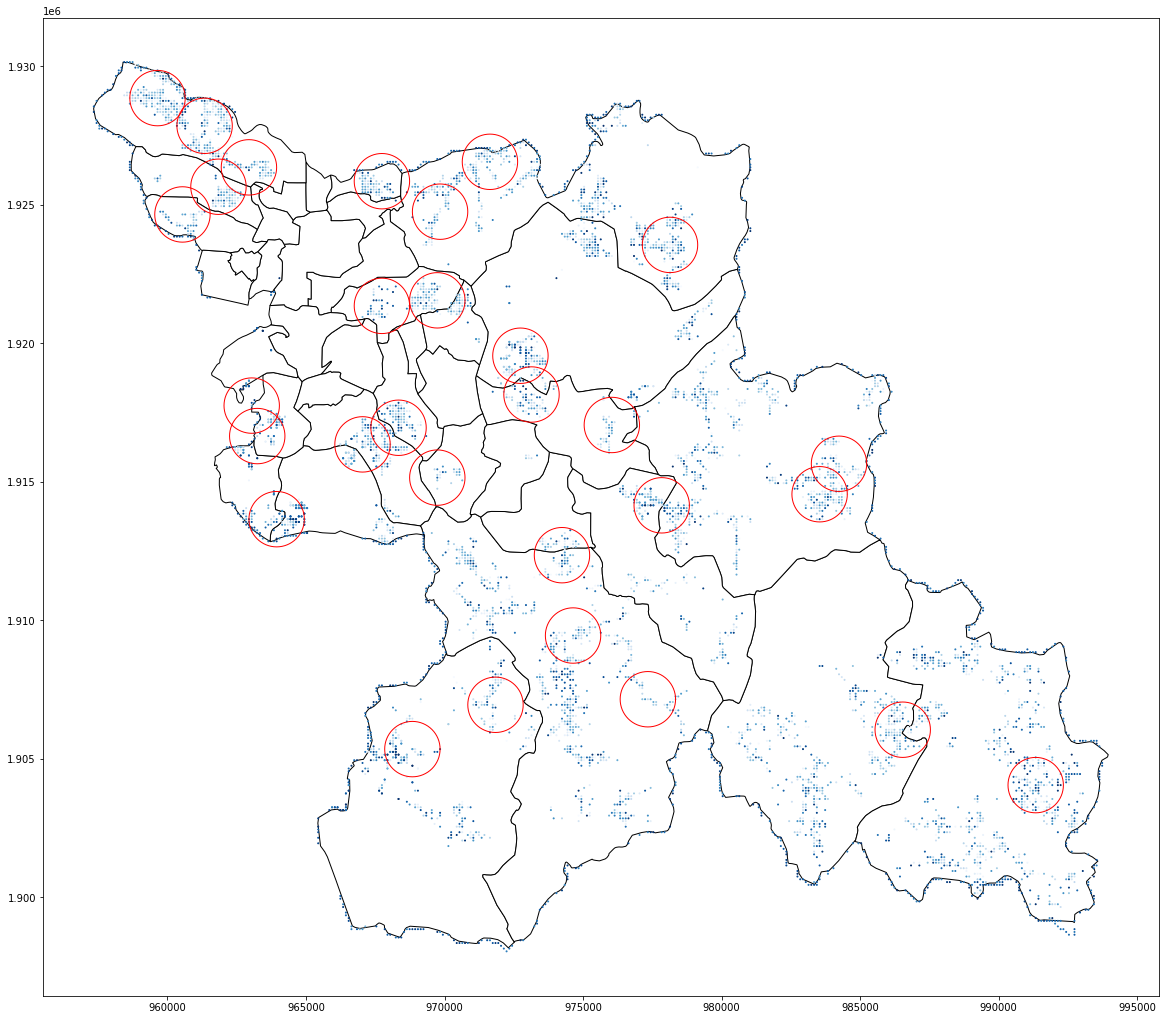

In [50]:
# Matplotlib 시각화
c=[str(item/255.) for item in df_demand['x_score'].to_list()]
base=df_shp.plot(figsize=(20,20),color='white',edgecolor='black')
df_demand.plot(ax=base,marker='o', c=df_demand.x_score, cmap='Blues', markersize=1)
# df.plot(ax=base,marker='o', color='green', markersize=1)
df.iloc[temp[temp[0]==1].index].buffer(1000).plot(ax=base,color='None',edgecolor='red')

In [26]:
df_demand.to_crs('epsg:4326',inplace=True)
df_demand['geometry'][0].xy[0][0],df_demand['geometry'][0].xy[1][0]

(127.21888757768183, 37.189801615166715)

In [51]:
# Folium 히트맵 시각화
from folium import plugins
import folium

map = folium.Map(location = [37.16649133015051,127.21461391126408], tiles='OpenStreetMap', zoom_start = 10)
df_demand.to_crs('epsg:4326',inplace=True)
heat_data = [[row.geometry.xy[1][0], row.geometry.xy[0][0],row.x_score] for _,row in df_demand.iterrows()]

plugins.HeatMap(heat_data,radius=15).add_to(map)
folium.GeoJson(data=buf["geometry"]).add_to(map)
folium.GeoJson(data=df_shp["geometry"], style_function=lambda x:{'fillColor':'None','stroke':0.5,'opacity':0.3,'color':'black'}).add_to(map)

map.save('/Users/jacob/Desktop/VS_Code_Repository/DeepLearning_Alpaco/빅콘테스트2022/Raw data/30mclp_result.html')
map